In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
df = pd.read_csv("~/Project_implementatoin_with_lifecycle_of_MLproject/alg_forestfire.csv", header=1)
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### 1. Data Cleaning
- Handled missing values (`dropna`, `fillna` strategies).
- Standardized column names.
- Removed duplicates and irrelevant features.
- Converted categorical variables into numerical form.

In [108]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [109]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [111]:
df['Region'] = df['Region'].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [113]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [114]:
df=df.dropna().reset_index(drop=True)

In [115]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [116]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [117]:
df=df.drop(122).reset_index(drop=True)

In [118]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [119]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [120]:
df['Classes']=df['Classes  ']

In [121]:
df.drop(columns=['Classes  '], axis=1, inplace=True)

In [122]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')

In [123]:
df.columns = df.columns.str.strip()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Region       243 non-null    int64 
 14  Classes      243 non-null    object
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [125]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Region       243 non-null    int64 
 14  Classes      243 non-null    object
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [127]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,not fire


In [128]:
objects = [i for i in df.columns if df[i].dtype == 'O']

In [129]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)
    pass

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Region       243 non-null    int64  
 14  Classes      243 non-null    object 
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [131]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [132]:
df.to_csv("cleaned.csv", index=False)

## . Exploratory Data Analysis (EDA)
- Visualized distributions of variables (Temperature, RH, Rain, etc.).
- Analyzed correlations between input features and FWI.
- Identified patterns and outliers using plots and statistical summaries.
- Checked class/region balance.

In [133]:
df_copy = df.drop(['day', 'year', 'month'], axis=1)

In [134]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,fire
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,not fire
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,not fire
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,not fire


In [135]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [136]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [137]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire


In [138]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [139]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,not fire
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,not fire


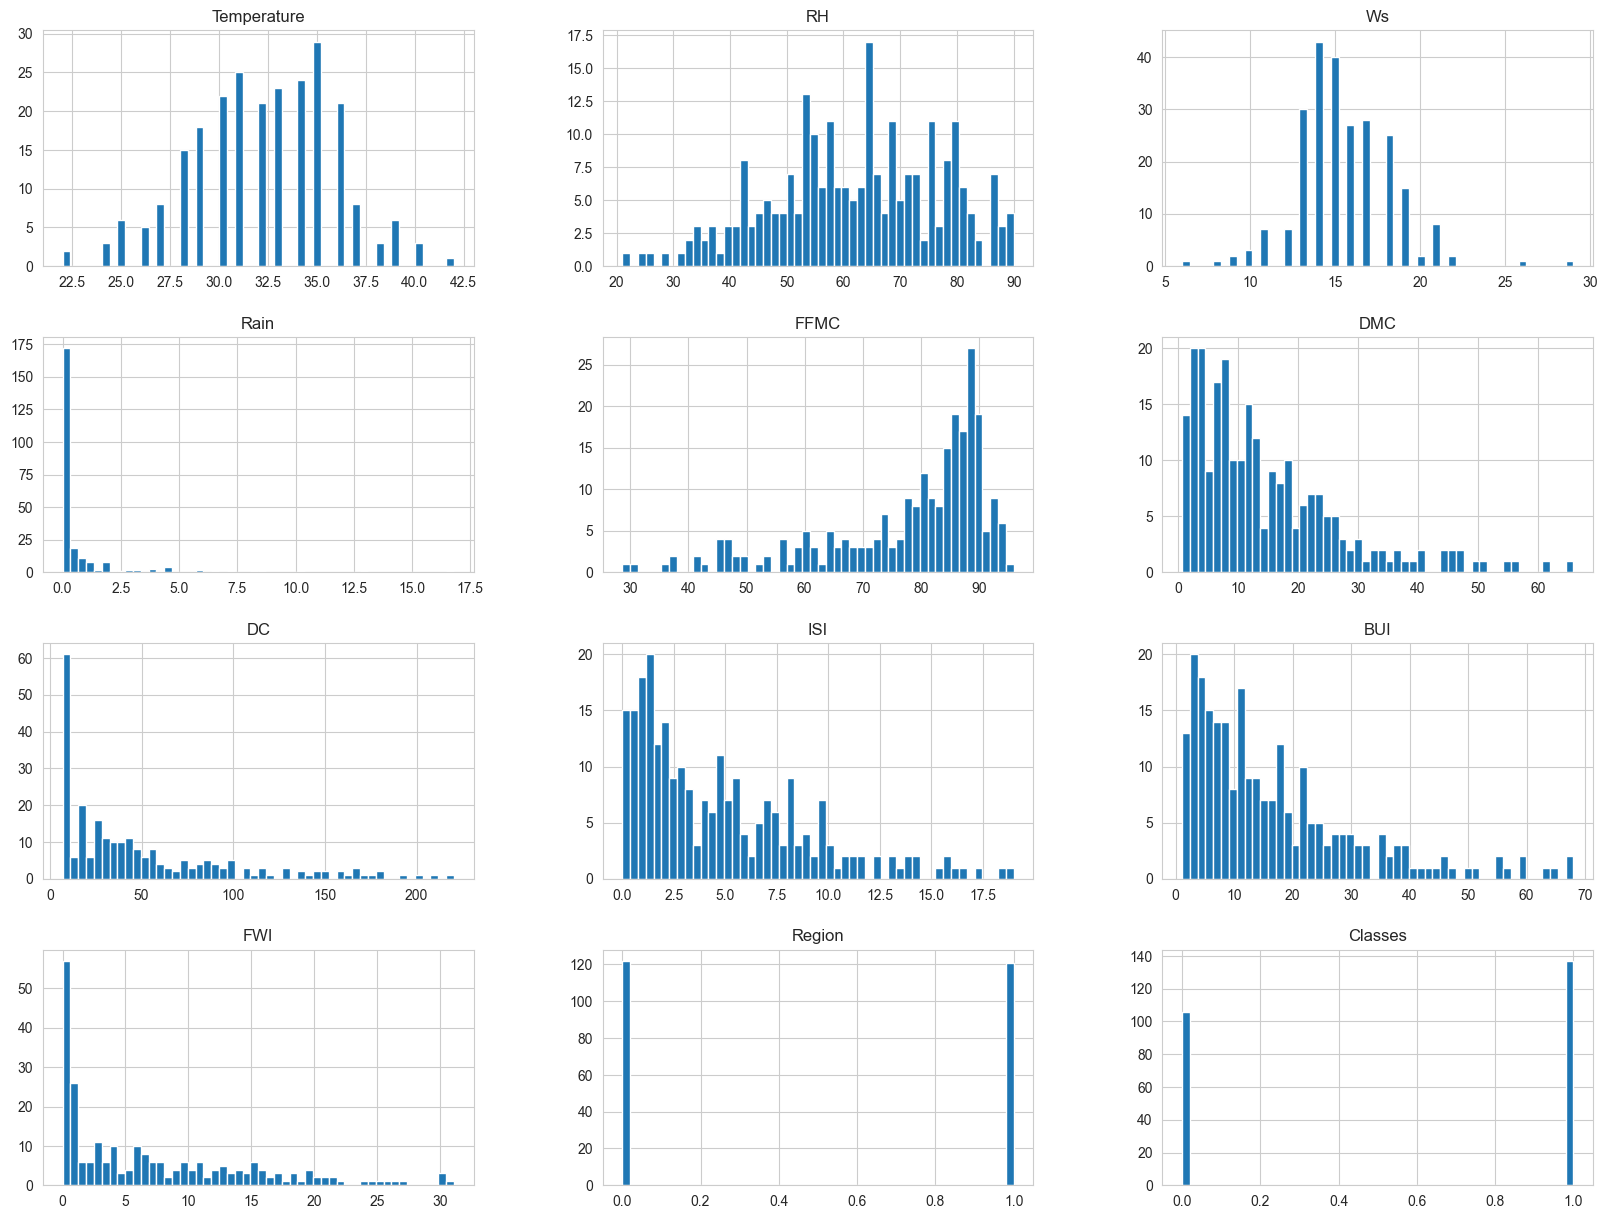

In [140]:
## plot density plot for all features
# plt.style.use("seaborn")
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()
              

In [141]:
percentage = df_copy['Classes'].value_counts(normalize=True) * 100

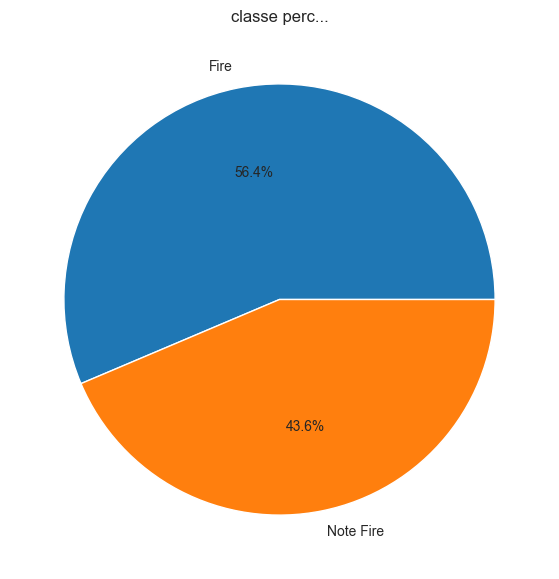

In [142]:
class_labels = ['Fire', 'Note Fire']
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=class_labels, autopct='%1.1f%%')
plt.title("classe perc...")
plt.show()

In [143]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


<Axes: >

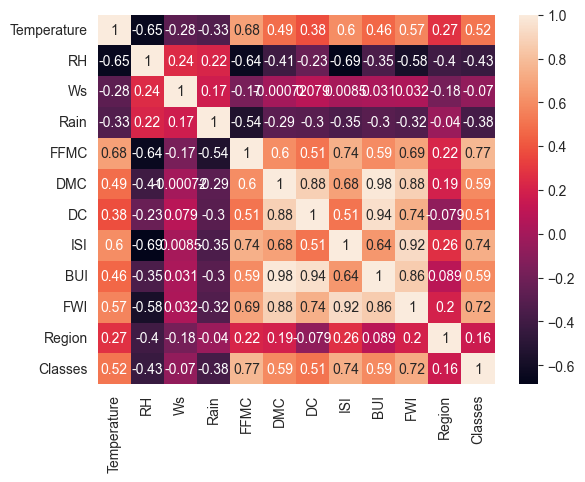

In [144]:
sns.heatmap(df_copy.corr(), annot=True)

<Axes: ylabel='FWI'>

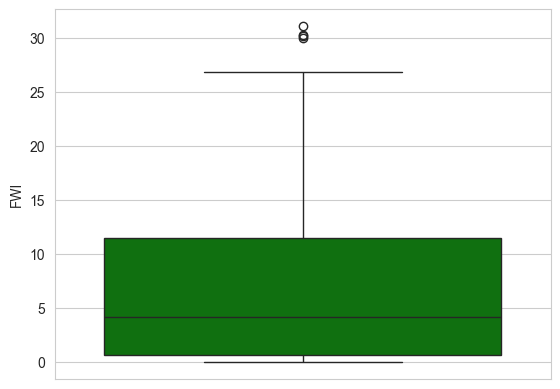

In [145]:
sns.boxplot(df_copy['FWI'], color='green')

Text(0.5, 1.0, 'fire analysis')

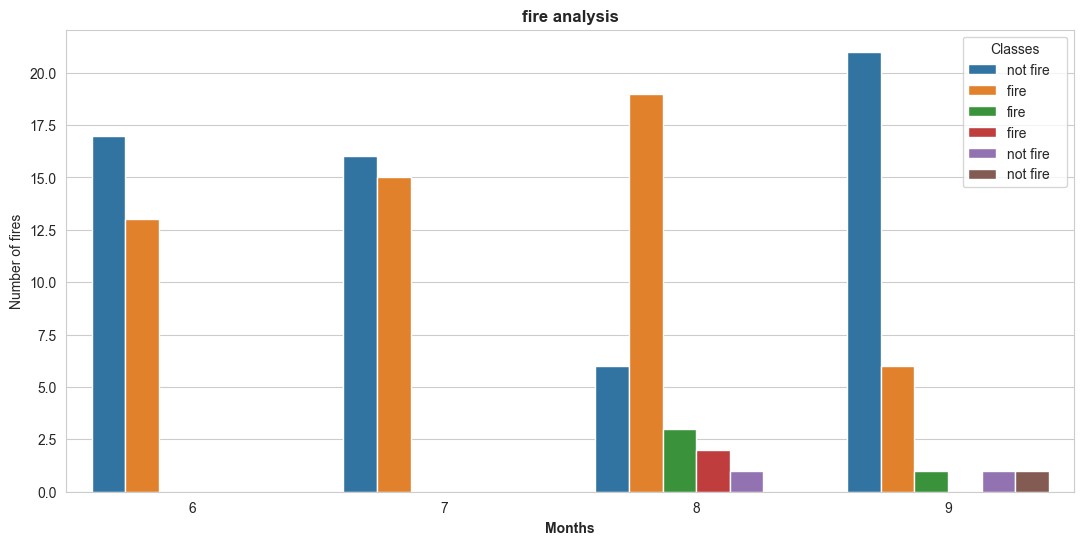

In [146]:
dftemp=df.loc[df['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.ylabel("Number of fires")
plt.xlabel("Months", weight="bold")
plt.title("fire analysis", weight = 'bold')

In [147]:
new_df = df = pd.read_csv("~/Project_implementatoin_with_lifecycle_of_MLproject/cleaned.csv")

# Machine learning section 
this section include the process that take to create a machine learning project include those three steps:
### 1. Feature Engineering
- Scaled features using **StandardScaler**.
- Created derived variables where useful.
- Encoded categorical variables (`Classes`, `Region`).

### 2. Model Training
- Tested different ML algorithms:
  - Linear Regression
  - Ridge Regression
- Used **cross-validation** and **hyperparameter tuning** to select the best model.

### 3. Model Saving (Pickling)
- Finalized model (`ridge_model.pkl`) was saved with `pickle`.
- Scaler (`standard_scaler.pkl`) also saved to ensure consistent preprocessing during predictions.


In [148]:
new_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire


In [149]:
new_df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [150]:
new_df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [151]:
new_df['Classes'] = np.where(new_df['Classes'].str.contains("not fire"), 0, 1)

In [152]:
new_df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## slpit the independent and the dependent features

In [153]:
x = new_df.drop(['FWI'], axis=1)
y = new_df['FWI']

In [154]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,0


In [155]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [156]:
## split test

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [159]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897,0.612239
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000,0.188837


<Axes: >

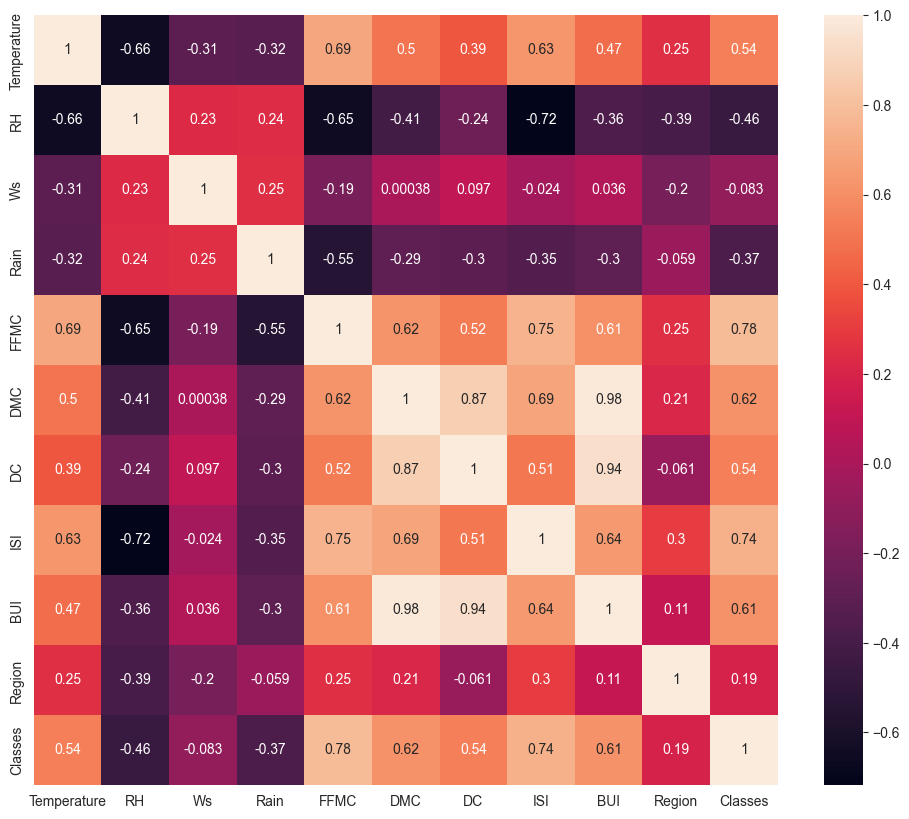

In [160]:
plt.figure(figsize=(12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [161]:
new_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'Classes'],
      dtype='object')

In [162]:
def detect_corr(data, target_value):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > target_value:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [163]:
corr_features=detect_corr(x_train, 0.85)

In [164]:
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

## Standardiziation or Feature Scaling

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

In [167]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## box plot to understand the effect of standardiziation 

Text(0.5, 1.0, 'x_train after scaling')

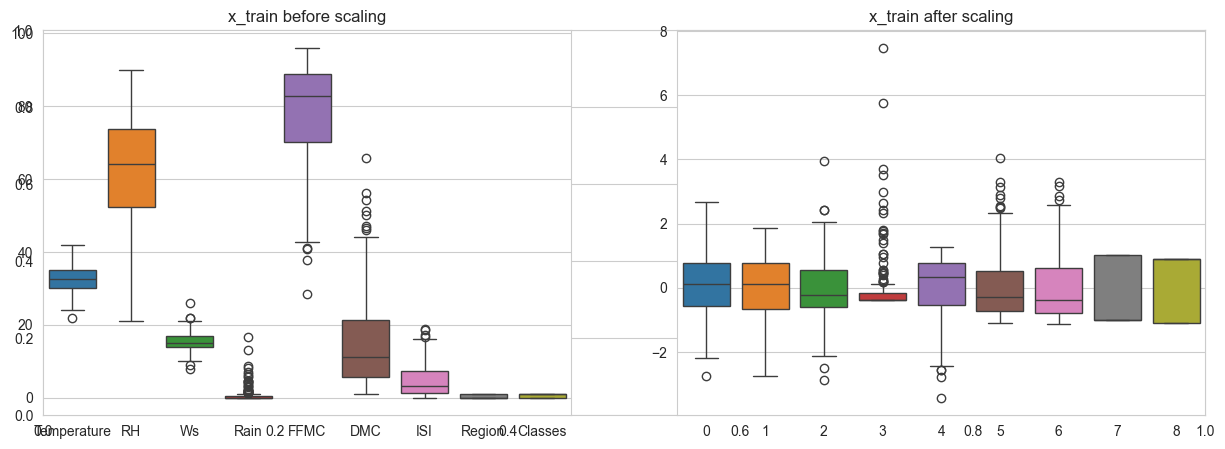

In [168]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")

## Liear Regression Model

Mean abs error 0.5468236465249976
r2 score 0.9847657384266951


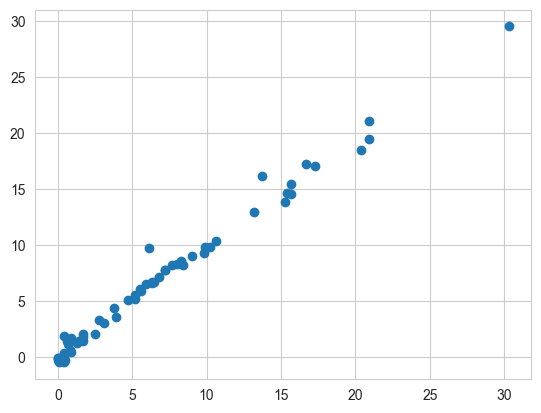

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear=LinearRegression()
linear.fit(x_train_scaled, y_train)
y_pred = linear.predict(x_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean abs error", mae)
print("r2 score", score)
plt.scatter(y_test, y_pred)

## Lasso Regression

mae results: 1.133175994914409
R2 score results: 0.9492020263112388


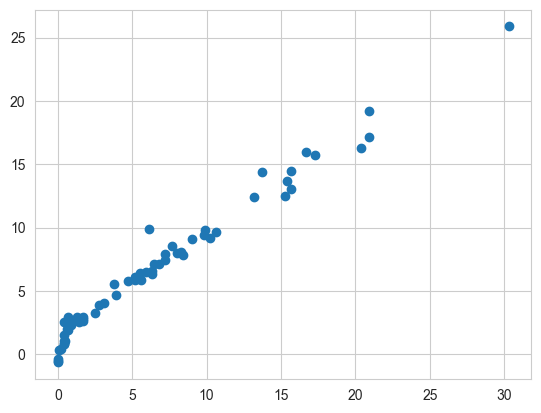

In [170]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mae results:", mae)
print("R2 score results:", score)
plt.scatter(y_test, y_pred)

mean abs error: 0.5642305340105715
R2 score 0.9842993364555512


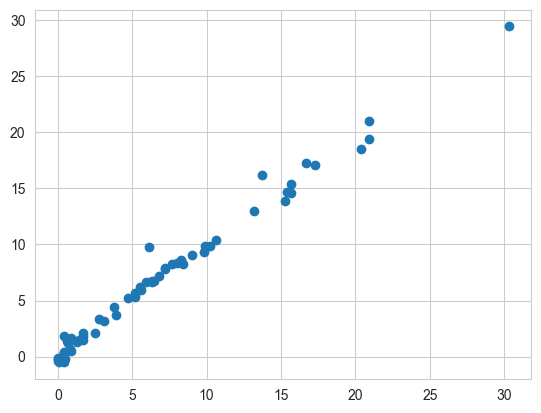

In [171]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean abs error:", mae)
print("R2 score", score)

In [172]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## Elasticnet Regression

mean abs error: 1.8822353634896
R2 score 0.8753460589519703


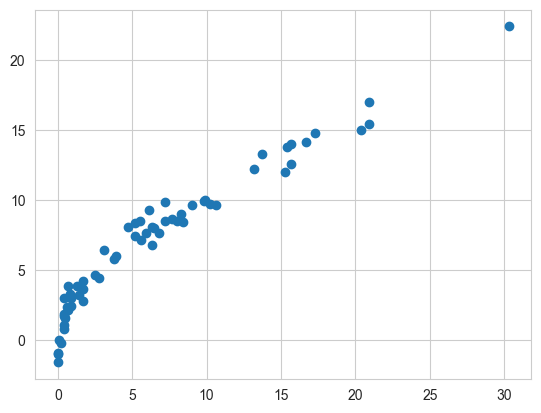

In [173]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_pred=elastic.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean abs error:", mae)
print("R2 score", score)

mean abs error: 0.657564353690908
R2 score 0.9814222062228235


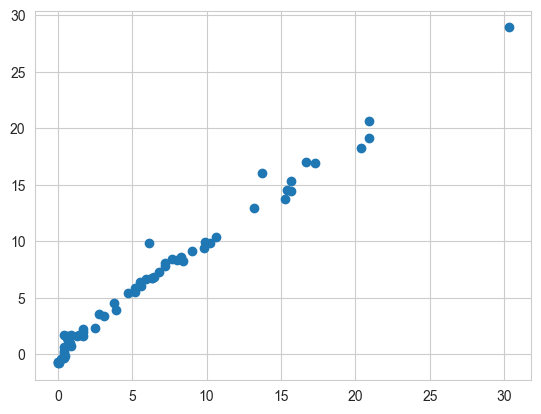

In [174]:
from sklearn.linear_model import ElasticNetCV
elasticv=ElasticNetCV()
elasticv.fit(x_train_scaled, y_train)
y_pred=elasticv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean abs error:", mae)
print("R2 score", score)

## Pickle

In [175]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridgecv, open("ridge.pkl", "wb"))